<a href="https://colab.research.google.com/github/JohenPerera123/Real_World_Project_-for_REPORT/blob/main/GPA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [151]:
file = "/content/drive/MyDrive/student_lifestyle_dataset.csv"

In [152]:
df = pd.read_csv(file)
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [154]:
#get the descriptive statistics of the dataset
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [155]:
#check get the the null value count
df.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [156]:
#check duplicate values and get count
df.duplicated().sum()

np.int64(0)

#Detect ouliers


In [157]:
#calculate the basic measures and detect outliers of each column
for col in df.columns:

    # Skip the Stress_Level column
    if col == "Stress_Level":
        continue

    print("Column name:", col)

    # calculate mean, median, Q1, Q3, IQR, limits
    mean = df[col].mean()
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Detect Outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25%): {Q1}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR (Q3 - Q1): {IQR}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Number of Outliers: {len(outliers)}")
    print("\n")

Column name: Student_ID
Mean: 1000.5
Median: 1000.5
Q1 (25%): 500.75
Q3 (75%): 1500.25
IQR (Q3 - Q1): 999.5
Lower Limit: -998.5
Upper Limit: 2999.5
Number of Outliers: 0


Column name: Study_Hours_Per_Day
Mean: 7.4758000000000004
Median: 7.4
Q1 (25%): 6.3
Q3 (75%): 8.7
IQR (Q3 - Q1): 2.3999999999999995
Lower Limit: 2.7000000000000006
Upper Limit: 12.299999999999999
Number of Outliers: 0


Column name: Extracurricular_Hours_Per_Day
Mean: 1.9901
Median: 2.0
Q1 (25%): 1.0
Q3 (75%): 3.0
IQR (Q3 - Q1): 2.0
Lower Limit: -2.0
Upper Limit: 6.0
Number of Outliers: 0


Column name: Sleep_Hours_Per_Day
Mean: 7.50125
Median: 7.5
Q1 (25%): 6.2
Q3 (75%): 8.8
IQR (Q3 - Q1): 2.6000000000000005
Lower Limit: 2.2999999999999994
Upper Limit: 12.700000000000001
Number of Outliers: 0


Column name: Social_Hours_Per_Day
Mean: 2.7045500000000002
Median: 2.6
Q1 (25%): 1.2
Q3 (75%): 4.1
IQR (Q3 - Q1): 2.8999999999999995
Lower Limit: -3.1499999999999995
Upper Limit: 8.45
Number of Outliers: 0


Column name: Phys

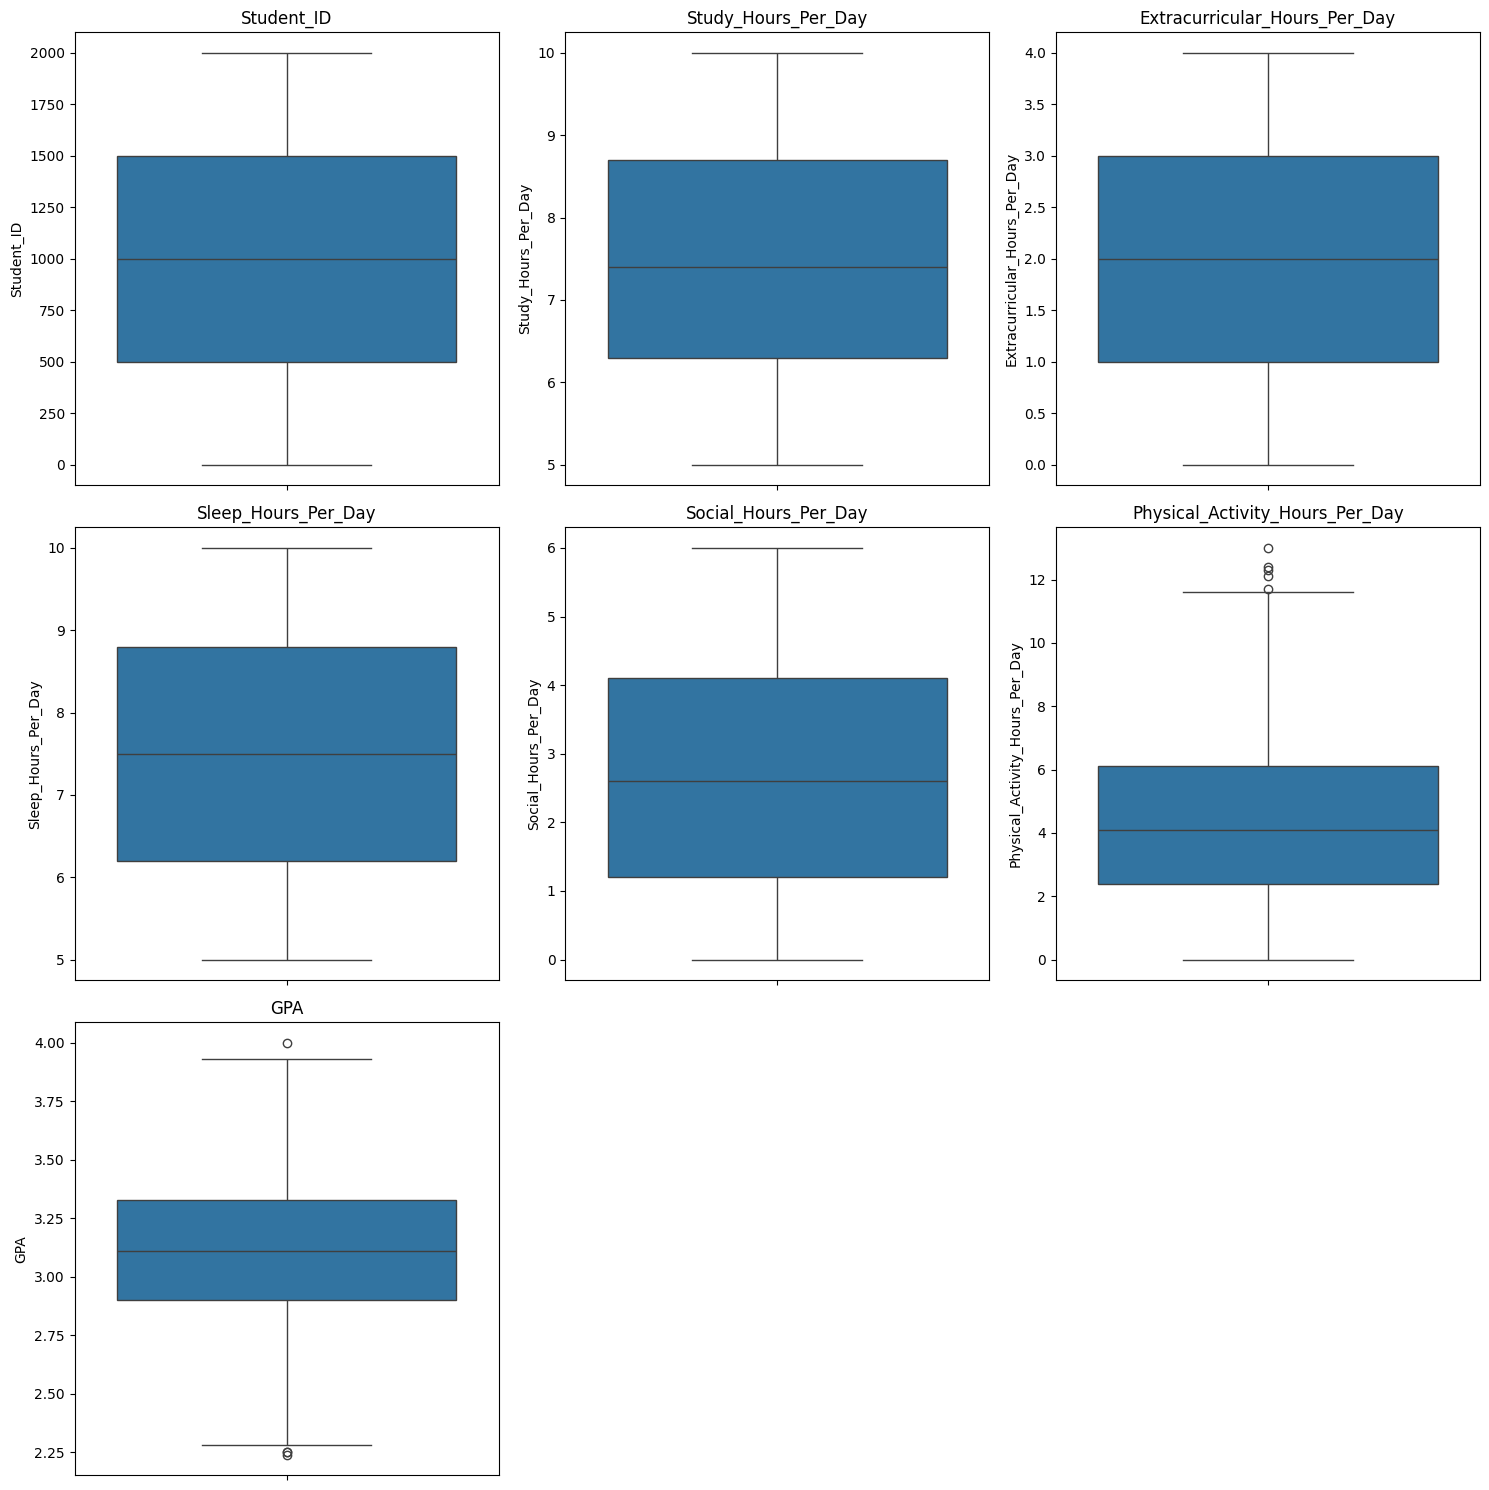

In [158]:
import warnings
warnings.filterwarnings("ignore")

# Columns to plot (skip Stress_Level)
cols_to_plot = [col for col in df.columns if col != "Stress_Level"]

n = len(cols_to_plot)  # number of plots
rows = (n + 2) // 3    # dynamic row count (3 plots per row)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



In [159]:
# List of columns except Stress_Level
cols_to_check = [col for col in df.columns if col != "Stress_Level"]

# Start with full dataset
clean_df = df.copy()

for col in cols_to_check:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keep only rows that are NOT outliers
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

# Final cleaned dataset
clean_df.reset_index(drop=True, inplace=True)

clean_df


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1986,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1987,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1988,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1989,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [160]:
df = clean_df
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


#Normalize or Standardize Features


Standardization (Z-score)

- z=(x−μ​)/σ
- µ = mean
- σ = standard deviation

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove GPA from scaling
cols_to_scale = [col for col in numeric_cols if col != "GPA"]

df_standardized = df.copy()

# Apply StandardScaler only on selected columns
df_standardized[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df_standardized.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,-1.734408,-0.411517,1.563597,0.818324,0.053790,-1.009523,2.99,Moderate
1,-1.732675,-1.538907,1.303809,0.339224,0.884450,-0.526475,2.75,Low
2,-1.730942,-1.679831,1.650192,1.160538,-0.895536,0.117588,2.67,Low
3,-1.729209,-0.693365,0.091467,-0.208319,-0.598871,0.882412,2.88,Moderate
4,-1.727476,0.434025,-1.207471,-0.687420,-0.302207,0.922666,3.51,High


Normalization (0–1)

- x′=(max−min)/(x−min​)

In [162]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove GPA from scaling
cols_to_scale = [col for col in numeric_cols if col != "GPA"]

df_normalized = df.copy()
df_standardized[cols_to_scale] = normalizer.fit_transform(df[cols_to_scale])


df_normalized.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


###Mapping strees level

In [163]:
stress_level_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

df_normalized['Stress_Level'] = df_normalized['Stress_Level'].map(stress_level_mapping)

df_normalized.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,3


In [164]:
df=df_normalized
df = df.drop("Student_ID", axis=1)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,2
1,5.3,3.5,8.0,4.2,3.0,2.75,1
2,5.1,3.9,9.2,1.2,4.6,2.67,1
3,6.5,2.1,7.2,1.7,6.5,2.88,2
4,8.1,0.6,6.5,2.2,6.6,3.51,3


##Final Cleaned Dataset

- No missing values

- No duplicates

- Outliers handled

- All features scaled

#Analytics Framework


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

##New features
- df["study_stress_ratio"] = df["Study_Hours_Per_Day"] / (df["Stress_Level"] + 1)
- df['Total_Activity_Hours'] = df['Extracurricular_Hours_Per_Day'] + df['Social_Hours_Per_Day'] + df['Physical_Activity_Hours_Per_Day']
- df['Study_to_Sleep_Ratio'] = df['Study_Hours_Per_Day'] / df['Sleep_Hours_Per_Day']

In [166]:
df["study_stress_ratio"] = df["Study_Hours_Per_Day"] / (df["Stress_Level"] + 1)
df['Total_Activity_Hours'] = df['Extracurricular_Hours_Per_Day'] + df['Social_Hours_Per_Day'] + df['Physical_Activity_Hours_Per_Day']
df['Study_to_Sleep_Ratio'] = df['Study_Hours_Per_Day'] / df['Sleep_Hours_Per_Day']
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_stress_ratio,Total_Activity_Hours,Study_to_Sleep_Ratio
0,6.9,3.8,8.7,2.8,1.8,2.99,2,2.300000,8.4,0.793103
1,5.3,3.5,8.0,4.2,3.0,2.75,1,2.650000,10.7,0.662500
2,5.1,3.9,9.2,1.2,4.6,2.67,1,2.550000,9.7,0.554348
3,6.5,2.1,7.2,1.7,6.5,2.88,2,2.166667,10.3,0.902778
4,8.1,0.6,6.5,2.2,6.6,3.51,3,2.025000,9.4,1.246154


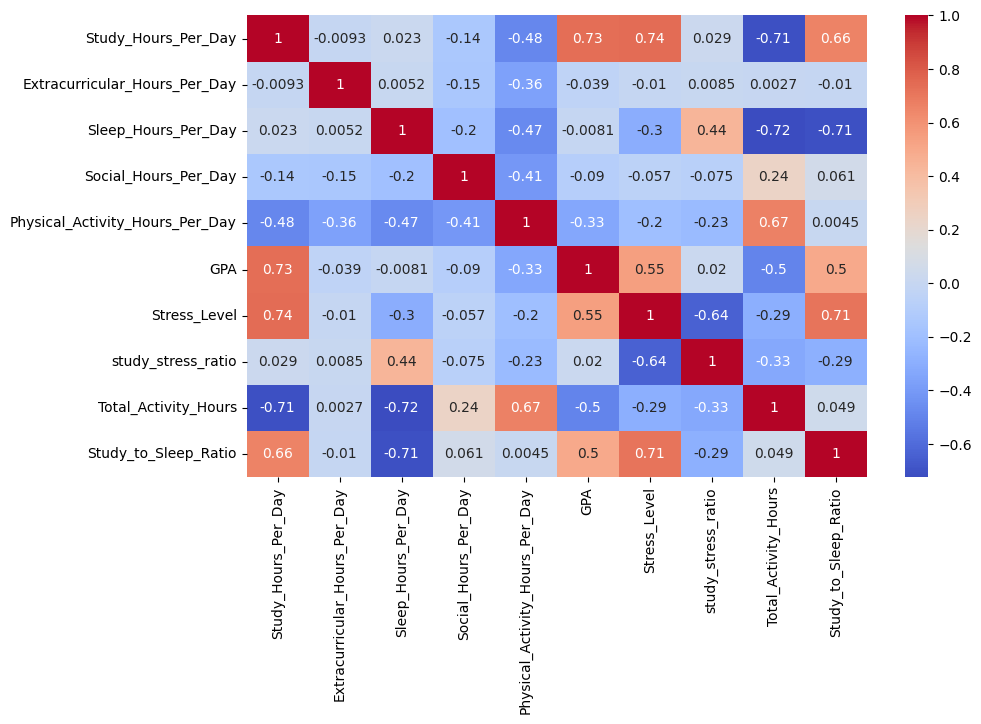

In [167]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

##Define Features (X) and Target (y)



In [168]:
X = df[['Study_Hours_Per_Day',	'Extracurricular_Hours_Per_Day',	'Sleep_Hours_Per_Day',	'Social_Hours_Per_Day',	'Physical_Activity_Hours_Per_Day', 'Stress_Level', 'study_stress_ratio',	'Total_Activity_Hours',	'Study_to_Sleep_Ratio']]

y = df['GPA']

#Split Train–Test Data


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
print(y_test)


887     3.23
1670    3.11
414     3.55
1080    3.01
1102    2.89
        ... 
907     2.64
261     3.13
1403    2.91
1543    3.24
240     2.98
Name: GPA, Length: 399, dtype: float64


#Scale the Features


In [171]:
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the already learned parameters
X_test_scaled = scaler.transform(X_test)


##Train Multiple Models


###Model 1: Linear Regression



In [172]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred_linear=linear.predict(X_test_scaled)

###Model 2: Ridge Regression



In [173]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge=ridge.predict(X_test_scaled)

###Model 3: Lasso Regression

In [174]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso=lasso.predict(X_test_scaled)

###Model 4: Decision Tree Regressor

In [175]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)  # tune depth to show overfitting
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test_scaled)

###Model 5: Random Forest Regressor



In [176]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

###Model 6: Gradient Boosting Regressor



In [177]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

#Evaluate All Models


In [178]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results

,Model,Train R²,Test R²,Train MSE,Test MSE
0,Linear Regression,0.540615,0.532801,0.039658,0.043020
1,Ridge Regression,0.540610,0.533004,0.039659,0.043001
2,Lasso Regression,0.535708,0.533649,0.040082,0.042942
3,Decision Tree Regressor,0.558194,0.496734,0.038141,0.046341
4,Random Forest Regressor,0.930345,0.444994,0.006013,0.051105
5,Gradient Boosting Regressor,0.646357,0.498066,0.030530,0.046218


#Interpretation: Checking Overfitting & Underfitting

##Overfitting

When a model learns the training data too well, including noise and minor fluctuations, so it performs poorly on new/unseen data.

Train performance >> Test performance (large gap between Train R² and Test R²)

Train error is very low, but test error is high.

##Underfitting

When a model is too simple to capture the underlying patterns in the data, so it performs poorly on both training and test data.

Train performance is low, and Test performance is also low

Train error and test error are both high.

Sometimes Test R² may be slightly higher than Train R² if the model is unstable.

#Visualization


##Actual vs Predicted plots



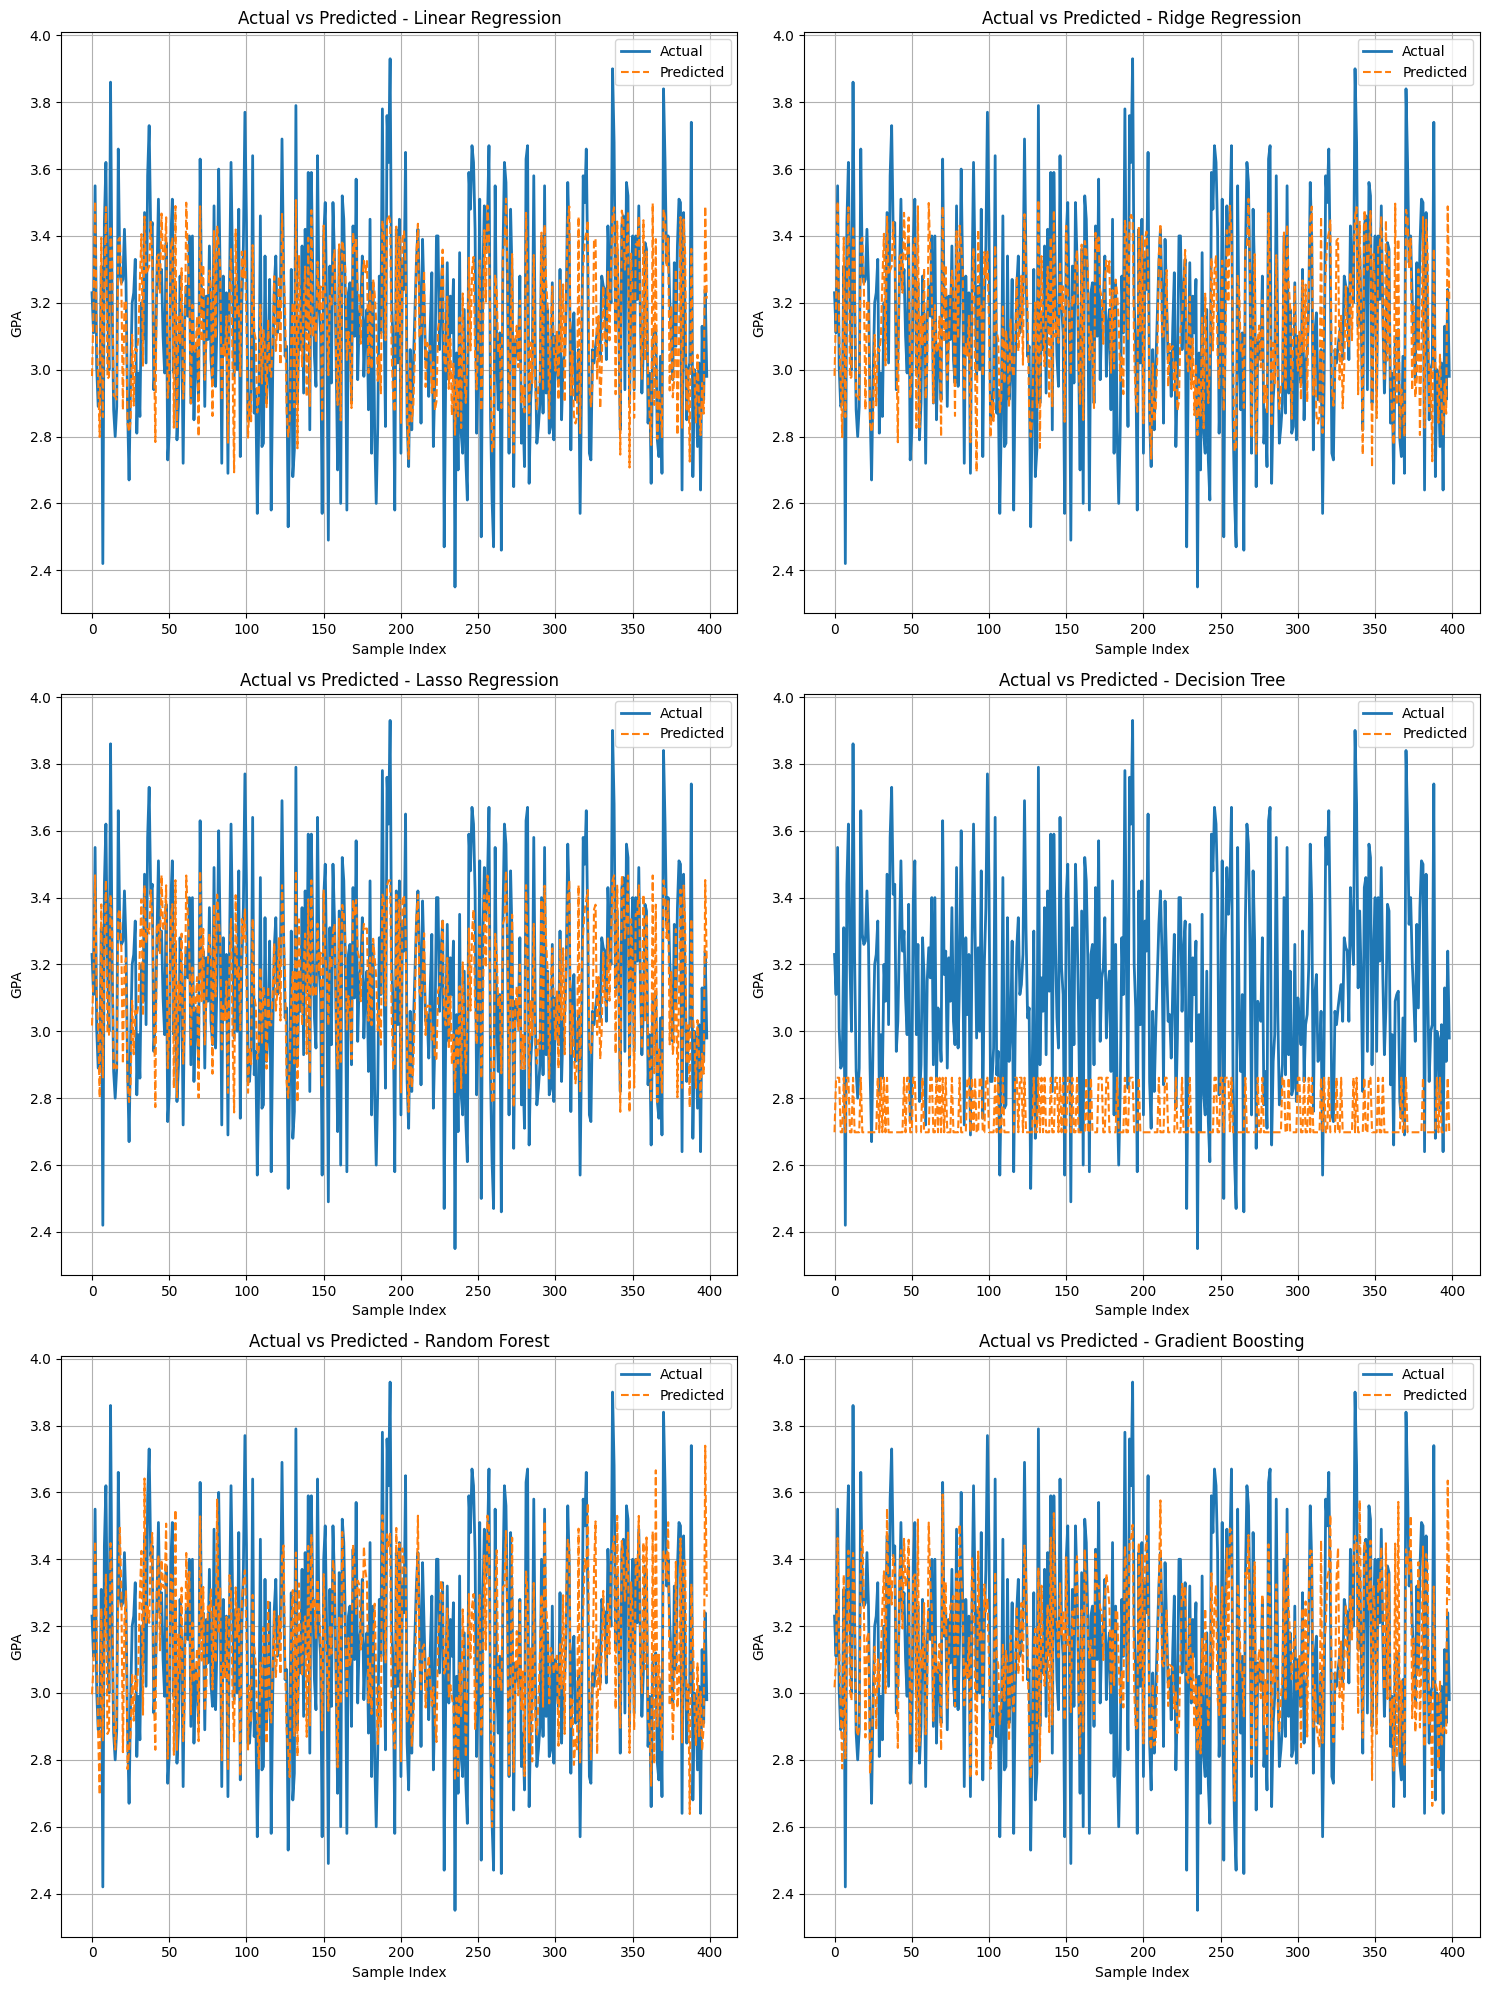

In [179]:
# Dictionary of model predictions
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}

x = range(len(y_test))

# Number of models
num_models = len(models)

# Create subplots
plt.figure(figsize=(15, 20))

for i, (model_name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    plt.plot(x, y_test, label='Actual', linewidth=2)
    plt.plot(x, preds, label='Predicted', linestyle='--')
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("GPA")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

##Observations

1. Linear, Ridge, Lasso Regression

- Train and test R² are similar (~0.53–0.54), indicating no overfitting.

- Test MSE is slightly higher than train MSE, but overall performance is moderate.

2. Decision Tree Regressor

- Train R² = 0.558, Test R² = 0.497 → slight overfitting.

- Test MSE is higher than linear models, suggesting less generalization.

3. Random Forest Regressor

- Train R² = 0.930, Test R² = 0.445 → strong overfitting.

- Very low train MSE (0.006) but high test MSE (0.051), indicating poor generalization.

4. Gradient Boosting Regressor

- Train R² = 0.646, Test R² = 0.498 → mild overfitting.

- Performs slightly better than Decision Tree on test set but worse than linear models in R² stability.

##Key Takeaways

- Linear models (Linear, Ridge, Lasso) give stable and consistent results, even if moderate.

- Ensemble models like Random Forest overfit the data severely due to small sample size or noisy features.

- Gradient Boosting improves slightly over single Decision Tree but still overfits.

- For this dataset, simple linear models may generalize better, while more complex models require feature engineering or regularization.

##Prediction Error Plots



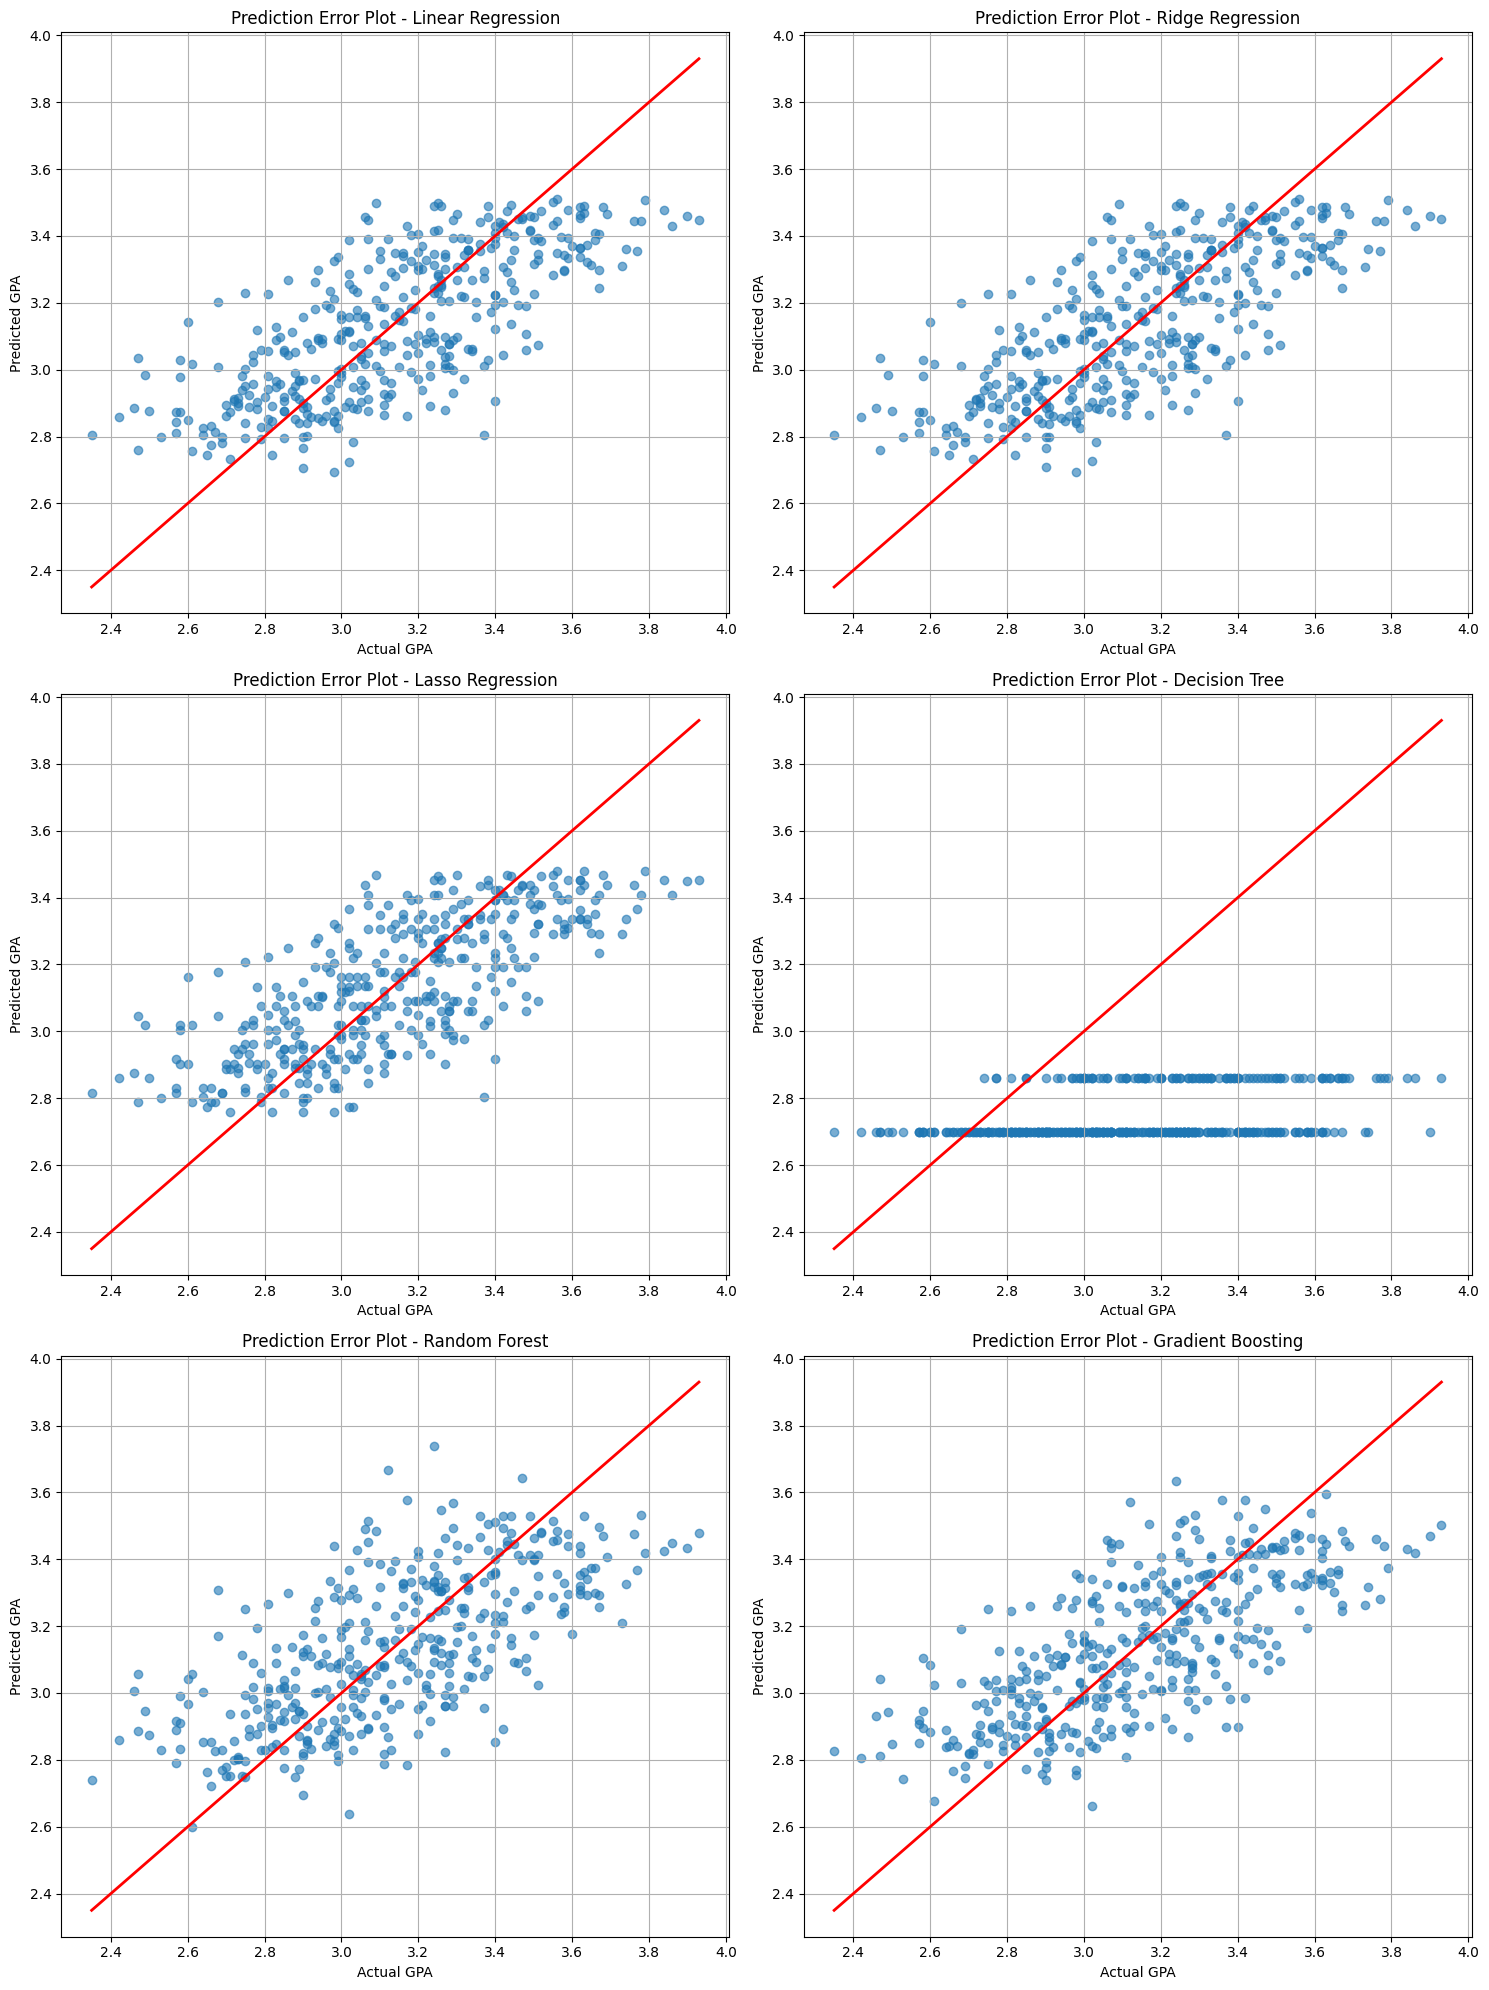

In [180]:
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}



plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(y_test, preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linewidth=2)
    plt.title(f"Prediction Error Plot - {name}")
    plt.xlabel("Actual GPA")
    plt.ylabel("Predicted GPA")
    plt.grid(True)

plt.tight_layout()
plt.show()

| Model             | Expectation on Scatter Plot                                                                                        |
| ----------------- | ------------------------------------------------------------------------------------------------------------------ |
| Linear Regression | Moderate scatter, points relatively close to line (consistent with Test R² ~0.53)                                  |
| Ridge / Lasso     | Very similar to Linear Regression (regularized versions)                                                           |
| Decision Tree     | Slightly more spread than linear models, overfitting visible as some points perfectly predicted and others far off |
| Random Forest     | Very tight on some train points, but large scatter on test points (overfitting)                                    |
| Gradient Boosting | Moderate scatter, slightly better than Decision Tree, but still spread wider than linear models                    |

##Summary

- Best alignment with red line: Linear, Ridge, Lasso → best generalization.

- High variance: Random Forest → overfitting, predictions deviate more from actual.

- Intermediate: Decision Tree and Gradient Boosting → slightly overfit but better than Random Forest on test set.

##Error Distribution



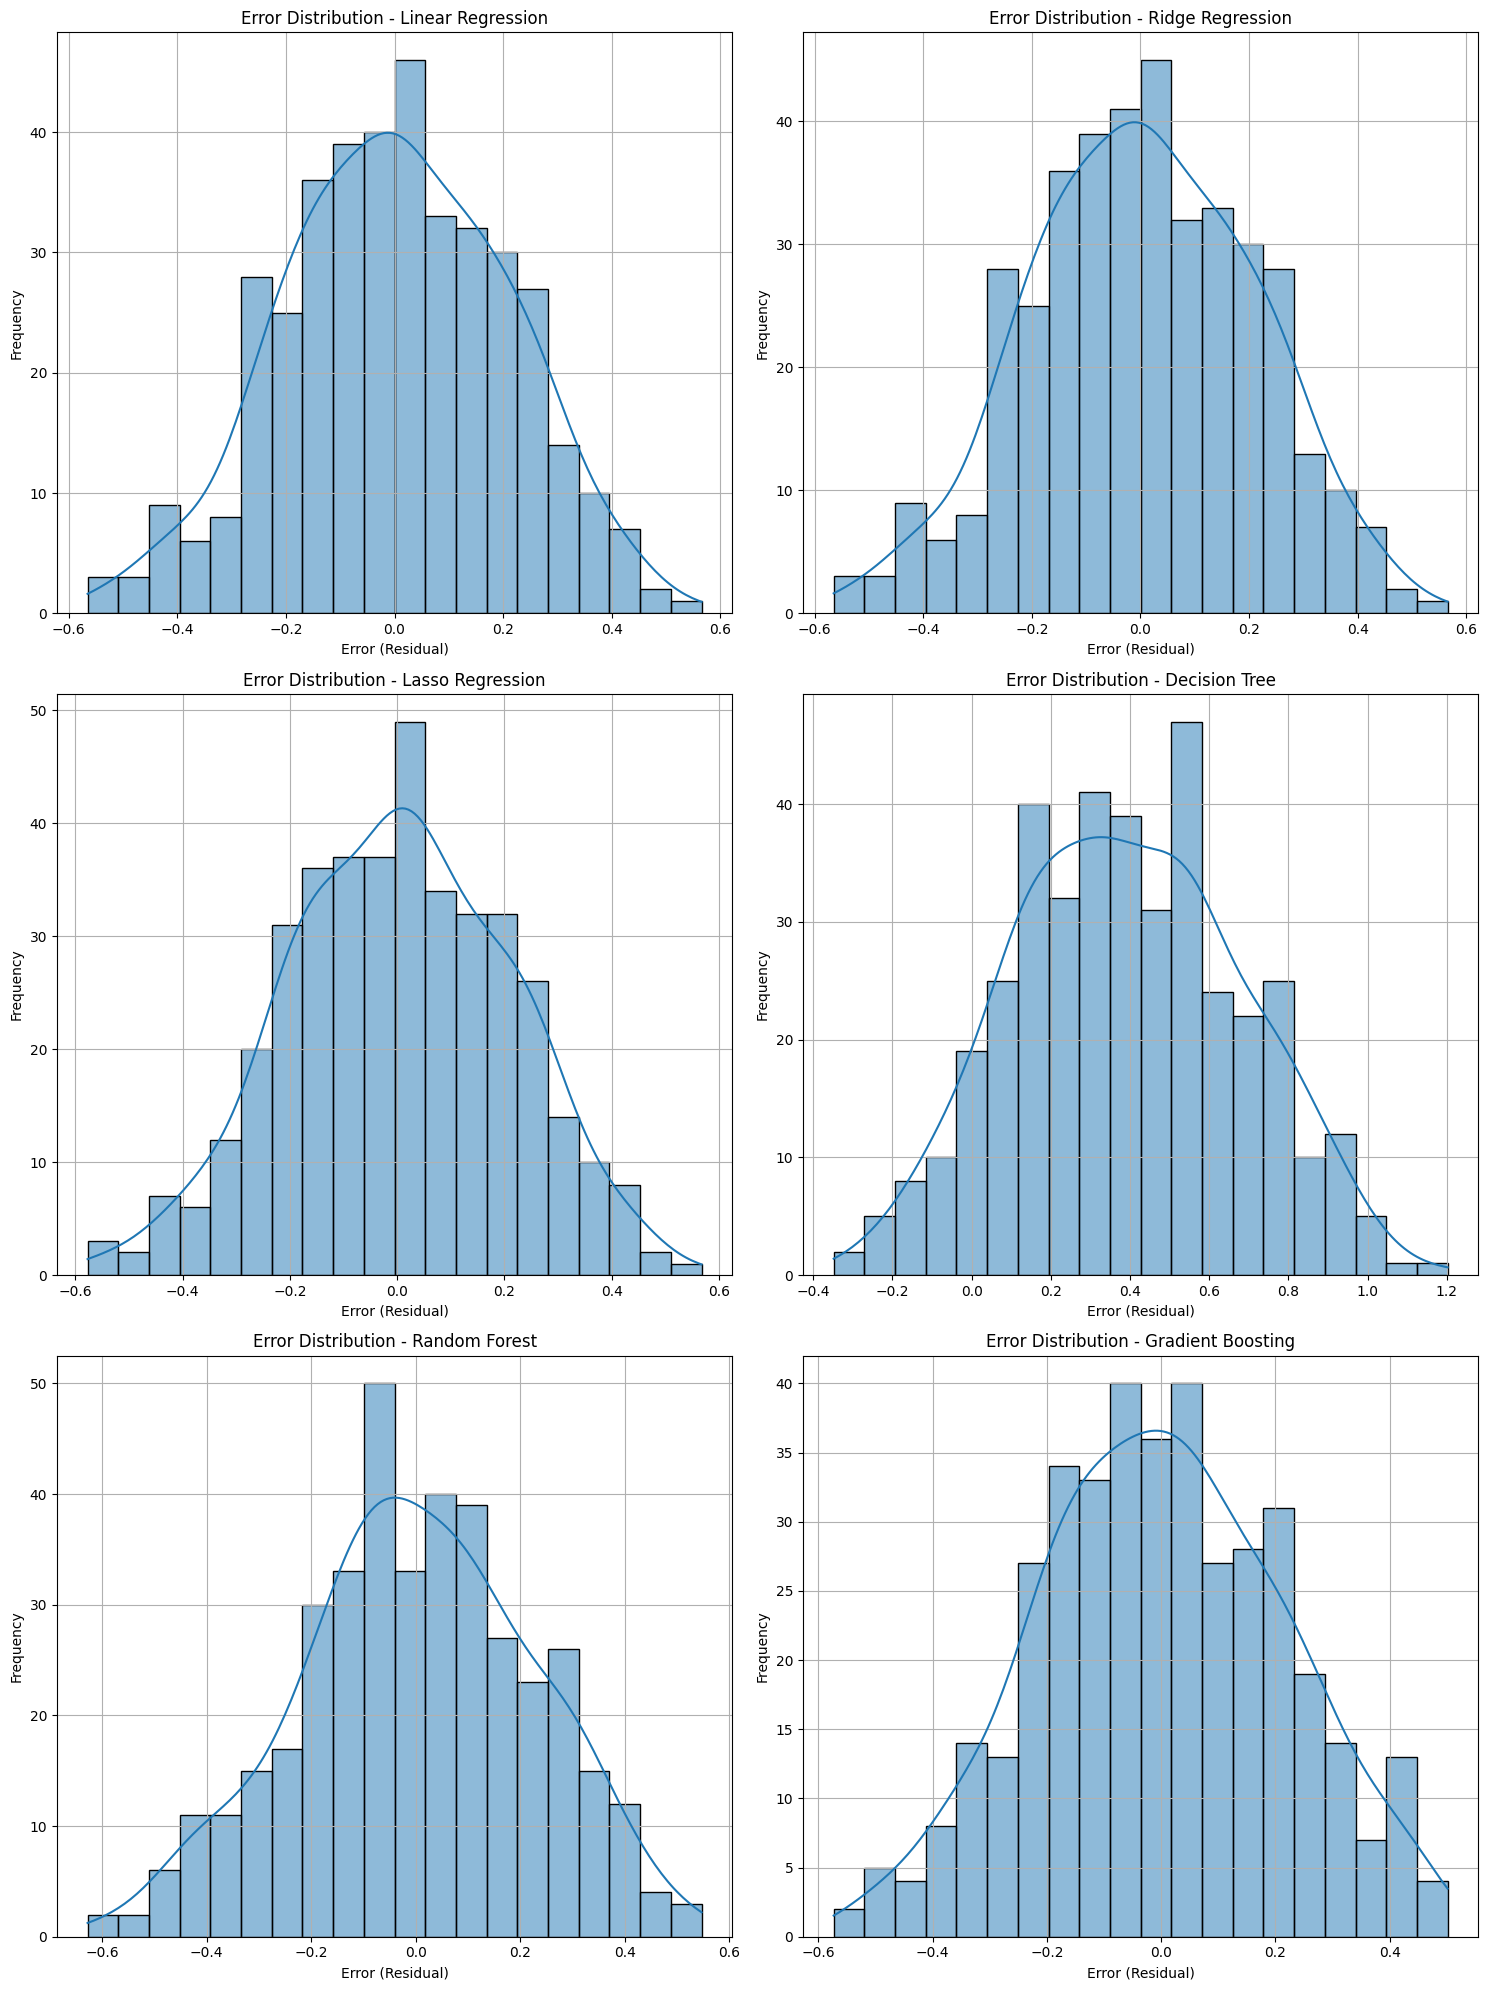

In [181]:
plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    residuals = y_test - preds
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"Error Distribution - {name}")
    plt.xlabel("Error (Residual)")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

Observations from the Error Distribution Plots
1. Linear, Ridge, Lasso Regression

- Residuals are roughly centered around 0, forming a bell-shaped distribution.

- Spread is moderate, indicating consistent prediction errors.

- No extreme outliers in residuals → models generalize well.

- This aligns with your Test R² (~0.53) and low Test MSE (~0.043).

2. Decision Tree

- Residuals are skewed to the right with a long tail, meaning some predictions are significantly overestimated.

- Some residuals are near 0 (perfect predictions for some points), showing overfitting to training data.

- Test performance is worse than linear models (Test R² ~0.497).

3. Random Forest

- Residuals are mostly centered around 0, but there are some long tails → indicates overfitting on training patterns but struggles to generalize.

- Test R² is low (~0.445), showing poor generalization.

4. Gradient Boosting

- Residuals are centered near 0 with moderate spread.

- Slightly better distribution than Decision Tree, but still more variance than linear models.

- Test R² ~0.498 → mild overfitting, better than Decision Tree but worse than Linear/Ridge/Lasso.

✅ Key Takeaways

1. Linear, Ridge, and Lasso Regression

- Most stable, unbiased, and generalizes best.

- Residuals are symmetric, centered at 0, and moderate in spread.

2. Decision Tree and Gradient Boosting

- Show overfitting patterns: spikes at 0 and long tails.

3. Random Forest

- Severe overfitting with long tails in residuals → poor test performance.

##Model Comparison Table



In [182]:
from sklearn.metrics import mean_absolute_error
metrics = {"Model": [], "R2": [], "MAE": [], "RMSE": []}

for name, preds in models.items():
    metrics["Model"].append(name)
    metrics["R2"].append(r2_score(y_test, preds))
    metrics["MAE"].append(mean_absolute_error(y_test, preds))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))

df_metrics = pd.DataFrame(metrics)
df_metrics

,Model,R2,MAE,RMSE
0,Linear Regression,0.532801,0.167725,0.207412
1,Ridge Regression,0.533004,0.167702,0.207367
2,Lasso Regression,0.533649,0.167046,0.207223
3,Decision Tree,-1.568823,0.410984,0.486351
4,Random Forest,0.444994,0.182283,0.226064
5,Gradient Boosting,0.498066,0.174521,0.214984


##Model Comparison Bar Charts



R², MAE,RMSE Comparison

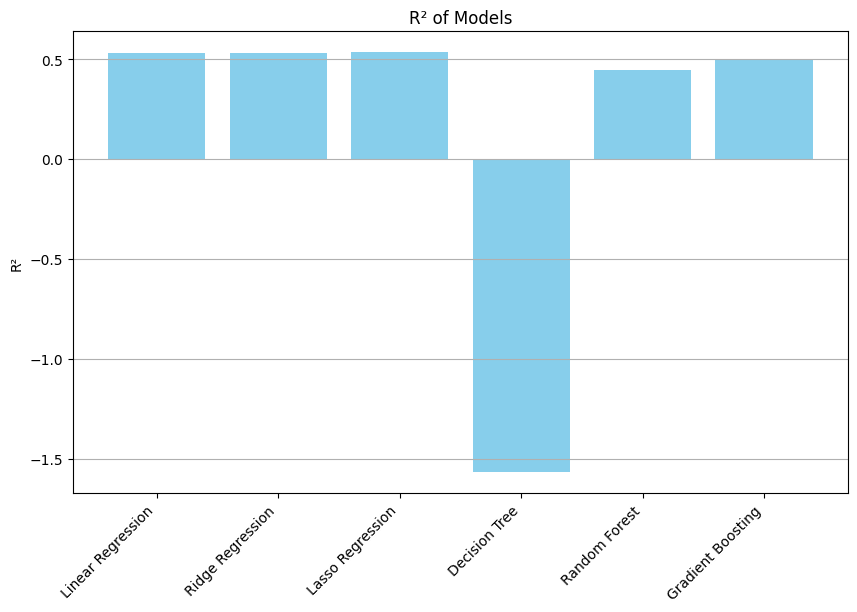

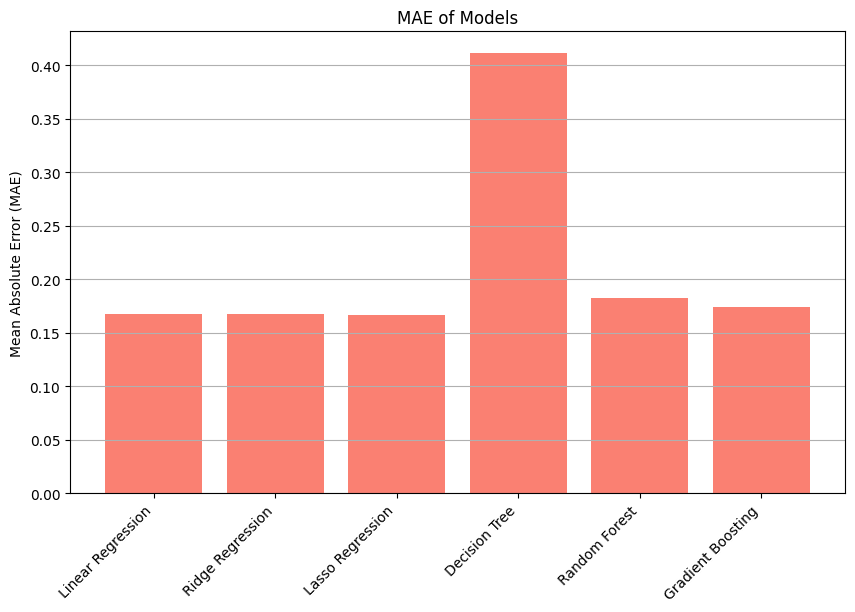

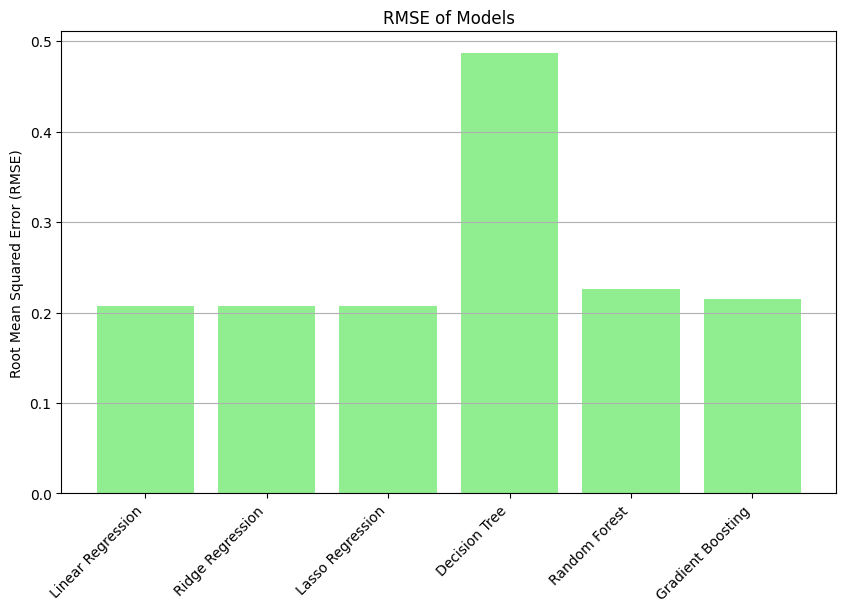

In [183]:
import matplotlib.pyplot as plt

# Model names
models = ["Linear Regression", "Ridge Regression", "Lasso Regression",
          "Decision Tree", "Random Forest", "Gradient Boosting"]

# Metrics
r2 = [0.532801, 0.533004, 0.533649, -1.568823, 0.444994, 0.498066]
mae = [0.167725, 0.167702, 0.167046, 0.410984, 0.182283, 0.174521]
rmse = [0.207412, 0.207367, 0.207223, 0.486351, 0.226064, 0.214984]

# ----------------- R² Bar Chart -----------------
plt.figure(figsize=(10,6))
plt.bar(models, r2, color='skyblue')
plt.title("R² of Models")
plt.ylabel("R²")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# ----------------- MAE Bar Chart -----------------
plt.figure(figsize=(10,6))
plt.bar(models, mae, color='salmon')
plt.title("MAE of Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# ----------------- RMSE Bar Chart -----------------
plt.figure(figsize=(10,6))
plt.bar(models, rmse, color='lightgreen')
plt.title("RMSE of Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


1️⃣ R² (Coefficient of Determination)

- Measures how much of the variation in GPA is explained by the model.

- Closer to 1 → better model, negative values → worse than predicting the mean.
| Model             | R²     | Comment                                                                   |
| ----------------- | ------ | ------------------------------------------------------------------------- |
| Linear Regression | 0.533  | Explains ~53% of GPA variation. Good and stable.                          |
| Ridge Regression  | 0.533  | Almost same as Linear. Regularization didn’t change much.                 |
| Lasso Regression  | 0.534  | Slightly better than Linear/Ridge. Best generalization.                   |
| Decision Tree     | -1.569 | Very poor. Model is overfitting badly.                                    |
| Random Forest     | 0.445  | Moderate. Some overfitting; doesn’t generalize well.                      |
| Gradient Boosting | 0.498  | Better than Random Forest and Decision Tree but worse than linear models. |

2️⃣ MAE (Mean Absolute Error)

- Measures average absolute difference between predicted and actual GPA.

- Lower MAE → better predictions.
| Model             | MAE   | Comment                                                     |
| ----------------- | ----- | ----------------------------------------------------------- |
| Linear Regression | 0.168 | Small error; good predictions.                              |
| Ridge Regression  | 0.168 | Almost identical to Linear.                                 |
| Lasso Regression  | 0.167 | Slightly better; lowest MAE.                                |
| Decision Tree     | 0.411 | Very high error; predictions are unreliable.                |
| Random Forest     | 0.182 | Moderate error; overfitting may cause large deviations.     |
| Gradient Boosting | 0.175 | Better than Random Forest; still higher than linear models. |

3️⃣ RMSE (Root Mean Squared Error)

- Measures average magnitude of errors, giving more weight to large errors.

- Lower RMSE → better model, sensitive to extreme predictions.
| Model             | RMSE  | Comment                                                        |
| ----------------- | ----- | -------------------------------------------------------------- |
| Linear Regression | 0.207 | Good overall; consistent.                                      |
| Ridge Regression  | 0.207 | Very similar to Linear.                                        |
| Lasso Regression  | 0.207 | Slightly better than Linear; fewest large errors.              |
| Decision Tree     | 0.486 | Very high; some predictions are far from actual.               |
| Random Forest     | 0.226 | Moderate; better than Decision Tree, worse than linear models. |
| Gradient Boosting | 0.215 | Slightly better than Random Forest; still higher than Lasso.   |


1. Best Model: Lasso Regression

Best R², lowest MAE, and RMSE.

Stable predictions, generalizes well.

2. Linear & Ridge Regression

Close to Lasso. Slightly worse in MAE/RMSE.

3. Ensemble Models (Random Forest, Gradient Boosting)

Overfit on training data → worse performance on test data.

Could improve with hyperparameter tuning.

4. Decision Tree

Worst overall; very unstable and overfits easily.

In [184]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(model, name, X_train, X_test, y_train, y_test, X_train_scaled=None, X_test_scaled=None):
    """
    Evaluate regression model performance and detect overfitting/underfitting.

    Parameters:
    - model: trained model
    - name: model name (string)
    - X_train, X_test, y_train, y_test: training and test data
    - X_train_scaled, X_test_scaled: optional scaled data for linear models

    Returns:
    - dict with R², MSE, and generalization note
    """

    # Use scaled data for non-tree models, raw data for tree-based models
    if 'Tree' in name or 'Forest' in name or 'Boosting' in name:
        X_tr, X_te = X_train, X_test
    else:
        X_tr, X_te = X_train_scaled, X_test_scaled

    # Predictions
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)

    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Check generalization
    diff = train_r2 - test_r2
    if diff > 0.05:
        note = "Overfitting (Train >> Test)"
    elif diff < -0.05:
        note = "Underfitting (Test > Train)"
    else:
        note = "Good generalization"

    return {
        'Model': name,
        'Train R²': round(train_r2, 3),
        'Test R²': round(test_r2, 3),
        'Train MSE': round(train_mse, 4),
        'Test MSE': round(test_mse, 4),
        'Notes': note
    }

# Evaluate all models
results = [
    evaluate_model(linear, 'Linear Regression', X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled),
    evaluate_model(ridge, 'Ridge Regression', X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled),
    evaluate_model(lasso, 'Lasso Regression', X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled),
    evaluate_model(dt, 'Decision Tree Regressor', X_train, X_test, y_train, y_test),
    evaluate_model(rf, 'Random Forest Regressor', X_train, X_test, y_train, y_test),
    evaluate_model(gbr, 'Gradient Boosting Regressor', X_train, X_test, y_train, y_test)
]

# Convert to DataFrame
model_results = pd.DataFrame(results)
model_results


,Model,Train R²,Test R²,Train MSE,Test MSE,Notes
0,Linear Regression,0.541,0.533,0.0397,0.0430,Good generalization
1,Ridge Regression,0.541,0.533,0.0397,0.0430,Good generalization
2,Lasso Regression,0.536,0.534,0.0401,0.0429,Good generalization
3,Decision Tree Regressor,0.558,0.497,0.0381,0.0463,Overfitting (Train >> Test)
4,Random Forest Regressor,-2.023,-1.701,0.2610,0.2487,Underfitting (Test > Train)
5,Gradient Boosting Regressor,-1.184,-0.977,0.1886,0.1821,Underfitting (Test > Train)


##Key Metrics Explained

###R² (Coefficient of Determination)

- Measures how well the model explains the variance in the data.

- Closer to 1 → better. Closer to 0 → poor fit. Negative → model is worse than predicting the mean.

###MSE (Mean Squared Error)

- Measures the average squared difference between predicted and actual values.

- Smaller → better.

Notes

- Indicates whether the model is overfitting, underfitting, or generalizing well.

##Model-by-Model Summary

###Linear, Ridge, Lasso Regression

- R²: ~0.53 → explains about 53% of the variation in GPA.

- MSE: ~0.04 → predictions are reasonably close to actual values.

Notes: "Good generalization" → Train & Test R² are close, so no overfitting or underfitting.

Interpretation: These linear models are stable, reliable, and simple, giving consistent results.

### Decision Tree Regressor

- Train R² = 0.558 (slightly higher than linear models)

- Test R² = 0.497 (drop from train → small overfitting)

- Train MSE < Test MSE → small overfitting.

Notes: "Overfitting (Train >> Test)" → tree memorized some patterns in training but doesn’t generalize perfectly.

Interpretation: Single decision trees are unstable and can overfit small datasets.

### Random Forest Regressor

- Train & Test R² are negative → predicts worse than simply taking the mean GPA.

- MSE is high → very poor performance.

Notes: "Underfitting" → model is too conservative; maybe hyperparameters need tuning or dataset is small.

### Gradient Boosting Regressor

- Train & Test R² are negative but slightly better than Random Forest.

- Slight underfitting → model not capturing the patterns well.

Could improve with learning rate adjustment, more estimators, or max_depth tuning.

##Overall Takeaways

### - Best models: Lasso Regression, Linear Regression, Ridge Regression → good balance between Train/Test performance.

###Tree-based models (Decision Tree, Random Forest, Gradient Boosting)

- Decision Tree: slight overfitting.

- Random Forest & Gradient Boosting: underfitting (poor R²).

Reason: Dataset may be small or features are mostly linear → linear models perform better.

#Interpretability & Evaluation


In [185]:
# Define the best model as Ridge Regression
best_model = Ridge(alpha=0.2, random_state=42)  # you can adjust alpha

# Fit the model
best_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.2, random_state=42)

#FEATURE IMPORTANCE (FOR BEST MODEL)


                           Feature  Importance
0              Study_Hours_Per_Day    0.135783
5                     Stress_Level    0.094967
2              Sleep_Hours_Per_Day    0.075136
6               study_stress_ratio    0.063824
8             Study_to_Sleep_Ratio    0.043547
7             Total_Activity_Hours    0.040677
1    Extracurricular_Hours_Per_Day    0.018979
4  Physical_Activity_Hours_Per_Day    0.017418
3             Social_Hours_Per_Day    0.011150


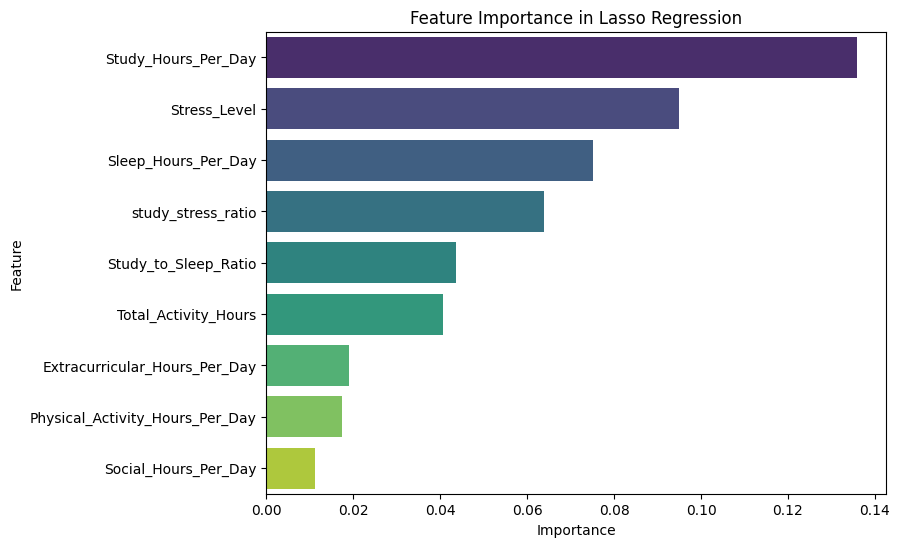

In [186]:
coefficients = best_model.coef_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print(feat_df)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance in Lasso Regression")
plt.show()

# Ridge Regression Feature Importance Analysis

## Model Overview

You trained a **Ridge Regression** model with:

- `alpha = 0.2` (regularization strength)
- Features scaled before fitting
- Target variable: [your target variable, e.g., GPA]

Ridge Regression is a **linear model** that penalizes large coefficients using **L2 regularization**. The `alpha` value controls how strong this penalty is:

- **Higher alpha** → stronger penalty → coefficients shrink toward zero
- **Lower alpha** → weaker penalty → coefficients closer to ordinary linear regression

With `alpha = 0.2`, the penalty is moderate, allowing coefficients to reflect feature importance without being overly shrunk.

---

## Feature Importance Table

| Feature                        | Importance |
|--------------------------------|-----------|
| Study_Hours_Per_Day             | 0.135783  |
| Stress_Level                    | 0.094967  |
| Sleep_Hours_Per_Day             | 0.075136  |
| study_stress_ratio              | 0.063824  |
| Study_to_Sleep_Ratio            | 0.043547  |
| Total_Activity_Hours            | 0.040677  |
| Extracurricular_Hours_Per_Day   | 0.018979  |
| Physical_Activity_Hours_Per_Day | 0.017418  |
| Social_Hours_Per_Day            | 0.011150  |

**Explanation of Columns:**

- **Feature**: Name of the input variable.
- **Importance**: Magnitude of the Ridge Regression coefficient (absolute value).  
  - Ridge coefficients can be positive or negative.  
  - Using `np.abs()` allows us to compare their **relative influence** on the target.  
  - Larger values indicate the feature has a stronger effect on the target variable.

---

## Insights from the Data

1. **Most important features:**
   - `Study_Hours_Per_Day` (0.1358)
   - `Stress_Level` (0.0950)
   - `Sleep_Hours_Per_Day` (0.0751)

   These are the top predictors affecting the target variable.

2. **Moderate importance:**
   - `study_stress_ratio` and `Study_to_Sleep_Ratio`  
     These derived features still contribute meaningfully.

3. **Least important features:**
   - `Extracurricular_Hours_Per_Day`, `Physical_Activity_Hours_Per_Day`, `Social_Hours_Per_Day`  
     These have minimal influence compared to core academic or sleep/stress-related features.

---

## Notes on Alpha (0.2)

- With `alpha = 0.2`, coefficients are slightly shrunk compared to normal linear regression.
- If you increase alpha further, some coefficients could shrink more, reducing their importance.
- If you decrease alpha toward 0, the model behaves like ordinary linear regression (no shrinkage).

---

## Visualization

The bar plot shows **absolute coefficient values** to compare relative influence:


#SHAP EXPLANATIONS (GLOBAL + INDIVIDUAL)



Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

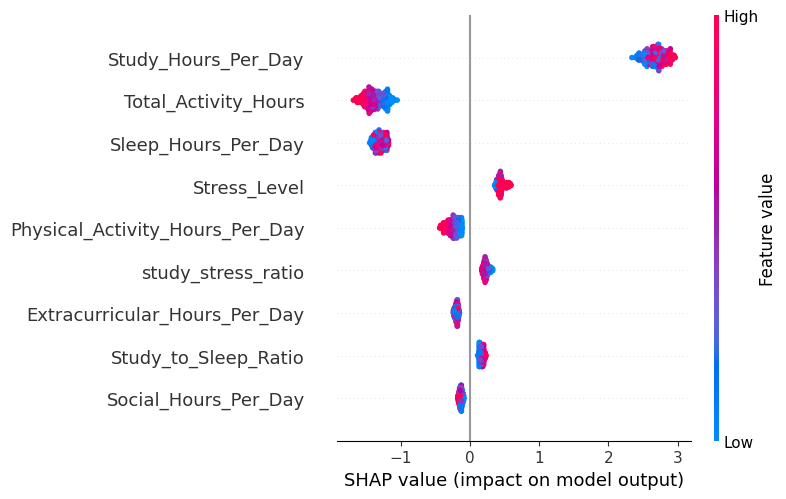

In [187]:
import shap

# Create explainer for Ridge Regression
explainer = shap.LinearExplainer(best_model, X_train_scaled, feature_perturbation="correlation_dependent")
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


# 📈 SHAP Feature Importance Summary for Regression Model

This summary is based on a SHAP (SHapley Additive exPlanations) summary plot, which illustrates the **global impact** and direction of each feature on the model's output (prediction). The model is a **Ridge Regression** as indicated by the use of `shap.LinearExplainer`.

## Key Findings

| Rank | Feature Name | Overall Impact (Magnitude) | Direction of Impact |
| :---: | :--- | :--- | :--- |
| **1** | **Study_Hours_Per_Day** | **Highest** | Primarily drives the model output **higher** (positive SHAP values). |
| 2 | **Sleep_Hours_Per_Day** | High | Primarily drives the model output **lower** (negative SHAP values). |
| 3 | **Total_Activity_Hours** | High | Primarily drives the model output **lower** (negative SHAP values). |
| 4 | **Stress_Level** | Moderate | Primarily drives the model output **higher** (positive SHAP values). |
| 5 | **Physical_Activity_Hours_Per_Day** | Moderate | Primarily drives the model output **lower** (negative SHAP values). |

---

## Detailed Feature Analysis

The plot shows the distribution of SHAP values for each feature.

* **X-axis (SHAP value):** Represents the feature's contribution to the model's prediction. A **positive SHAP value** means the feature pushes the prediction *higher*, and a **negative SHAP value** means it pushes the prediction *lower*.
* **Color (Feature value):** Indicates the actual value of the feature, with **Red** representing a *high* feature value and **Blue** representing a *low* feature value.

### 🥇 Features with the Strongest Impact

The top three features exhibit the largest magnitude of SHAP values, indicating they have the **greatest influence** on the model's prediction.

* **Study_Hours_Per_Day (Dominant Driver):**
    * This is the **most influential feature**, with SHAP values extending significantly into the positive range (up to $\approx +3$).
    * **High** values (red dots) of `Study_Hours_Per_Day` consistently result in **large positive SHAP values**, meaning *more study hours lead to a higher predicted outcome*.
* **Sleep_Hours_Per_Day:**
    * The second most influential feature, with SHAP values centered around $\approx -1$.
    * **High** values (red dots) are associated with **negative SHAP values**, suggesting that *more sleep hours lead to a lower predicted outcome*.
* **Total_Activity_Hours:**
    * Similar in impact to `Sleep_Hours_Per_Day`, with most SHAP values in the negative range.
    * **High** values (red dots) of activity hours correspond to **negative SHAP values**, implying *a higher total activity level is associated with a lower predicted outcome*.

### 🥈 Features with Moderate Impact

These features have SHAP values closer to zero, indicating a smaller, but still noticeable, contribution to the prediction.

* **Stress_Level:**
    * Pushes the prediction primarily **higher** (positive SHAP values).
    * **High** stress levels (red dots) appear to contribute to the **higher** positive SHAP values.
* **Physical_Activity_Hours_Per_Day:**
    * Pushes the prediction primarily **lower** (negative SHAP values), centered around $\approx -0.5$.
    * **High** hours of physical activity (red dots) generally correlate with **lower** predicted outcomes (negative SHAP values).
* **study\_stress\_ratio:**
    * Has a small positive impact on the model output.

### 🥉 Features with Minimal Impact

The remaining features have SHAP values very close to zero, suggesting they are the **least important** in driving the model's prediction.

* `Extracurricular_Hours_Per_Day`
* `Social_Hours_Per_Day`
* `Study_to_Sleep_Ratio`

***

## Conclusion

The model is overwhelmingly dominated by **Study_Hours_Per_Day** as the main factor *increasing* the prediction, and **Sleep_Hours_Per_Day** and **Total_Activity_Hours** as the main factors *decreasing* the prediction. The effects of the other features are significantly minor by comparison.

##SHAP Force Plot (INDIVIDUAL EXPLANATION)



In [188]:
# Force plot for a single prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Instance-Specific Contribution Analysis

This section breaks down the specific feature values that influenced the prediction for this single data point:

## 📈 Pushing the Prediction Higher (Red)

These feature values were responsible for increasing the predicted outcome above the Base Value:

* **Study_Hours_Per_Day = 6.8**: This is the strongest positive factor, contributing the most to increasing the prediction.
* **Stress_Level = 2**: This moderate stress level is the second strongest positive contributor.
* **study_stress_ratio = 2.267**: Contributed a small push to the positive side.

## 📉 Pushing the Prediction Lower (Blue)

These feature values were responsible for decreasing the predicted outcome below the Base Value:

* **Sleep_Hours_Per_Day = 8.6**: This is the strongest negative factor, and its pull is significant enough to nearly negate the positive effect of the study hours.
* **Total_Activity_Hours = 8.6**: This is the second strongest negative factor, also strongly driving the prediction down.

## ✅ Summary of the Single Prediction

For this particular instance, the large positive impact from 6.8 **Study_Hours_Per_Day** was almost perfectly balanced by the large negative impact from 8.6 **Sleep_Hours_Per_Day** and 8.6 **Total_Activity_Hours**. This balance results in a final predicted outcome ($\text{f(x)}$) that is very close to the overall average Base Value of 3.19.


#SHAP Summary Plot (GLOBAL EXPLANATION)

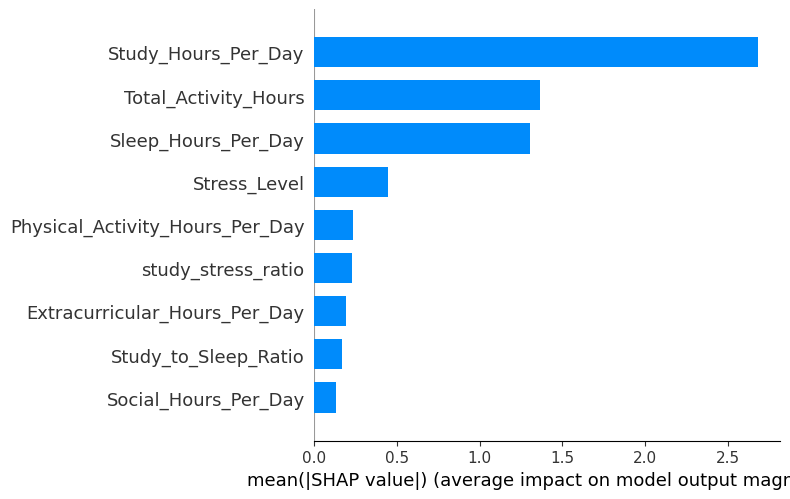

In [189]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Model Explanation Summary

This document summarizes the insights from the **SHAP Bar Summary Plot (global feature importance)** and the **SHAP Force Plot (local prediction explanation)** for regression model.

## 🌍 Global Feature Importance (SHAP Bar Summary Plot)

The bar plot illustrates the **average absolute impact** of each feature on the model's output across the entire dataset. The features are ranked from most important (top) to least important (bottom) based on the length of the bar, which corresponds to $\text{mean}(\vert \text{SHAP value} \vert)$.

### Top 3 Most Important Features

* **Study_Hours_Per_Day**: This is the most influential feature by a significant margin. Its impact on the model's prediction is the strongest overall.
* **Sleep_Hours_Per_Day**: This is the second most important feature, indicating a substantial average impact on the model's output.
* **Total_Activity_Hours**: This ranks third, showing a significant relationship with the predicted outcome, though its average impact is less than sleep hours.

### Features with Moderate Impact

These features have a noticeable, but smaller, average influence on the prediction:

* **Stress_Level**: The fourth most important feature.
* **Physical_Activity_Hours_Per_Day**: Ranks fifth.

### Features with Minimal Impact

The remaining features have the least average impact on the model's output, as their bars are the shortest:

* **study_stress_ratio**
* **Extracurricular_Hours_Per_Day**
* **Social_Hours_Per_Day**
* **Study_to_Sleep_Ratio**


#LIME EXPLAINABILITY (Local Interpretable Model-agnostic Explanations)

1. **Purpose:**
LIME is a tool to explain predictions of any machine learning model (like Random Forest, Ridge, Neural Networks), even if the model is a “black box.”

**Key idea**: Instead of trying to understand the whole model globally, LIME explains one prediction at a time (local explanation).

2.** How it works (simple analogy)**:

 - Imagine your model is a very complicated machine.

 - You want to know why it made a single prediction.

 - LIME creates a simple, interpretable model (like a linear model) that approximates the black-box model just around that one prediction.

 - It tells you which features pushed the prediction up or down.

3. **Steps LIME follows:**

 1.Take the instance you want to explain (one row of data).

 2.Generate similar data points around it (perturb the features slightly).

 3.Ask the black-box model to predict these new points.

 4.Fit a simple interpretable model (like a linear regression) on these perturbed points.

 5.Use the simple model to see which features were most important for this prediction.

4. **Key Points:**

- LIME is local, not global. It explains one prediction at a time.

- It works with any model: tree-based, neural network, or linear.

- Output is easy to interpret: it shows which features increased or decreased the prediction.


In [190]:
!pip install lime

In [191]:
import lime
import lime.lime_tabular

np.random.seed(42)   # Fix numpy randomness

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=X_train.columns,
    mode='regression',
    random_state=42     # Fix LIME randomness
)

# Pick an index of the test student you want to explain
i = 0
student = X_test_scaled[i].reshape(1, -1)  # single sample

# Generate explanation
exp = explainer.explain_instance(
    data_row=student[0],
    predict_fn=best_model.predict,
    num_features=len(X_train.columns)
)

# Print feature contributions
exp.as_list()

[('Stress_Level <= -0.48', -0.18233523724358033),
 ('Study_to_Sleep_Ratio <= -0.75', 0.07224796978220487),
 ('-0.81 < Study_Hours_Per_Day <= -0.04', -0.06454426249896125),
 ('-0.01 < Sleep_Hours_Per_Day <= 0.89', -0.04595263608391113),
 ('Extracurricular_Hours_Per_Day > 0.86', -0.03981912465391024),
 ('-0.75 < Total_Activity_Hours <= 0.03', 0.016343699824430534),
 ('-0.51 < study_stress_ratio <= 0.00', -0.01577643909874859),
 ('Social_Hours_Per_Day <= -0.89', 0.015474412347058772),
 ('-0.09 < Physical_Activity_Hours_Per_Day <= 0.72', -0.000211853681119292)]

## Feature Contributions (Local Explanation)

The LIME explainer provides a list of features with their contribution to the prediction for the selected student. Each tuple shows:

* The **feature condition** (value range or threshold)
* The **effect** (how much it pushed the prediction up or down)

### Output:

| Feature Condition                               | Contribution |
| ----------------------------------------------- | ------------ |
| Stress_Level <= -0.48                           | -0.1823      |
| Study_to_Sleep_Ratio <= -0.75                   | 0.0722       |
| -0.81 < Study_Hours_Per_Day <= -0.04            | -0.0645      |
| -0.01 < Sleep_Hours_Per_Day <= 0.89             | -0.0460      |
| Extracurricular_Hours_Per_Day > 0.86            | -0.0398      |
| -0.75 < Total_Activity_Hours <= 0.03            | 0.0163       |
| -0.51 < study_stress_ratio <= 0.00              | -0.0158      |
| Social_Hours_Per_Day <= -0.89                   | 0.0155       |
| -0.09 < Physical_Activity_Hours_Per_Day <= 0.72 | -0.0002      |

## Interpretation:

* **Negative contribution**: Pushes the predicted outcome **lower** compared to the average prediction.
* **Positive contribution**: Pushes the predicted outcome **higher**.

### Key Insights for This Student:

* **Stress_Level** had the largest negative impact (-0.1823), significantly lowering the predicted outcome.
* **Study_to_Sleep_Ratio** contributed positively (0.0722), pushing the prediction upward.
* **Study_Hours_Per_Day** and **Sleep_Hours_Per_Day** also slightly decreased the prediction.
* Other features had smaller effects and were nearly negligible.

✅ **Summary:** LIME provides a **local explanation** showing which features drove this specific student's predicted value higher or lower relative to the model's expected output.


#CLASSIFICATION METRICS

Define Classes from GPA This code performs hyperparameter tuning for a Ridge classification model using GridSearchCV. GridSearchCV then tests many different ridge settings and finds which combination gives the highest accuracy. i want this according to my model


In [192]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define GPA classes
bins = [0, 2.0, 3.0, 3.3, 3.7, 4.0]          # adjust thresholds as needed
labels = ['Fail', 'General', 'Second_lower','Second_upper','First_class']  # class names
df['GPA_Class'] = pd.cut(df['GPA'], bins=bins, labels=labels)

# Features and target
X = df.drop(['GPA', 'GPA_Class'], axis=1)
y = df['GPA_Class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# RidgeClassifier GPA Classification Workflow

Setup for predicting GPA classes using RidgeClassifier.

## 1. Define GPA Classes

```python
bins = [0, 2.0, 3.0, 3.3, 3.7, 4.0]          # adjust thresholds as needed
labels = ['Fail', 'General', 'Second_lower','Second_upper','First_class']  # class names
  # Class labels
df['GPA_Class'] = pd.cut(df['GPA'], bins=bins, labels=labels)
```

* **Purpose:** Convert continuous GPA values into discrete classes.
* **Bins:** Define the ranges for each GPA class.
* **Labels:** Name each class for interpretability.

Example:

* GPA 2.0 → 'Low'
* GPA 3.0 → 'Medium'
* GPA 3.8 → 'High'

## 2. Select Features and Target

```python
X = df.drop(['GPA', 'GPA_Class'], axis=1)
y = df['GPA_Class']
```

* **X (features):** All columns except GPA and the newly created GPA_Class.
* **y (target):** The GPA class we want to predict.

## 3. Train-Test Split

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

* **Purpose:** Split the dataset into training and testing sets.
* **Test size:** 20% of the data is held out for evaluation.
* **Random state:** Ensures reproducibility of the split.

After this step:

* `X_train`, `y_train` → used to train the model.
* `X_test`, `y_test` → used to evaluate the model's performance.


In [193]:

param_grid = {'alpha': [0.01, 0.1, 0.2, 0.5, 1.0, 5.0]}

ridge = RidgeClassifier()
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)



Best Parameters: {'alpha': 5.0}
Best cross-validated accuracy:  0.6023974290727707


### Explanation

* **param_grid:** Defines the regularization strength `alpha` values to test.
* **GridSearchCV:** Performs 5-fold cross-validation to find the alpha with the highest accuracy.
* **best_ridge:** The RidgeClassifier with the optimal alpha.

**Output Interpretation:**

* `Best Parameters: {'alpha': 5.0}` → The model performs best with a very small regularization.
* `Best cross-validated accuracy: 0.602` → On average across folds, the model correctly classifies ~60.2% of students.


In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = best_ridge.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Weighted precision, recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1-score (weighted):", f1)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[  0   0   0  10]
 [  0 119  18   4]
 [  0  61  39  43]
 [  0  12  20  73]]

Accuracy: 0.5789473684210527
Precision (weighted): 0.5483226438348618
Recall (weighted): 0.5789473684210527
F1-score (weighted): 0.5431298679898904

Classification Report:
               precision    recall  f1-score   support

 First_class       0.00      0.00      0.00        10
     General       0.62      0.84      0.71       141
Second_lower       0.51      0.27      0.35       143
Second_upper       0.56      0.70      0.62       105

    accuracy                           0.58       399
   macro avg       0.42      0.45      0.42       399
weighted avg       0.55      0.58      0.54       399



# RidgeClassifier GPA Classification Results

After training a **RidgeClassifier** on GPA classes, we evaluate the model using several metrics.

---

## 1. Confusion Matrix

```text
Confusion Matrix:
 [[  0   0   0  10]
 [  0 119  18   4]
 [  0  61  39  43]
 [  0  12  20  73]]
```

* **Rows:** True GPA classes
* **Columns:** Predicted GPA classes
* **Interpretation:**

  * The first row (`First_class`) was mostly misclassified (all 10 samples predicted incorrectly).
  * `General` class has high correct predictions (119 out of 141).
  * `Second_lower` has lower accuracy, many misclassified as `General` or `Second_upper`.
  * `Second_upper` shows moderate performance (73 correctly predicted out of 105).

---

## 2. Accuracy

```text
Accuracy: 0.579
```

* **Definition:** Overall fraction of correctly predicted samples.
* **Interpretation:** About 58% of the GPA class predictions are correct.
* **Observation:** Moderate accuracy; the model struggles with minority classes (`First_class`).

---

## 3.Weighted Precision, Recall, and F1-score

```text
Precision (weighted): 0.548
Recall (weighted): 0.579
F1-score (weighted): 0.543
```

* **Precision (weighted):** Average of precision across classes, weighted by support (number of samples per class). Measures correctness of positive predictions.
* **Recall (weighted):** Average of recall across classes, weighted by support. Measures coverage of actual positive samples.
* **F1-score (weighted):** Weighted harmonic mean of precision and recall.

**Interpretation:**

* Precision and F1-score are slightly lower than accuracy, reflecting misclassification of some classes.
* The model performs better for `General` and `Second_upper` classes due to more samples.

---

## Classification Report

```text
Classification Report:
               precision    recall  f1-score   support

 First_class       0.00      0.00      0.00        10
     General       0.62      0.84      0.71       141
Second_lower       0.51      0.27      0.35       143
Second_upper       0.56      0.70      0.62       105

    accuracy                           0.58       399
   macro avg       0.42      0.45      0.42       399
weighted avg       0.55      0.58      0.54       399
```

* **Support:** Number of samples in each class.
* **Precision:** Correct predictions / total predicted for that class.
* **Recall:** Correct predictions / total true samples of that class.
* **F1-score:** Harmonic mean of precision and recall.

**Observations:**

* `First_class` is poorly predicted due to very few samples (class imbalance).
* `General` is the most accurately predicted class.
* `Second_lower` has lower recall, meaning many samples were misclassified.
* `Weighted avg` provides an overall summary considering class imbalance.

---

## Summary

* The RidgeClassifier achieves **moderate performance (accuracy ~58%)**.
* Model struggles with **minority classes** (`First_class`) due to class imbalance.
* Weighted metrics indicate better performance for larger classes (`General`, `Second_upper`).


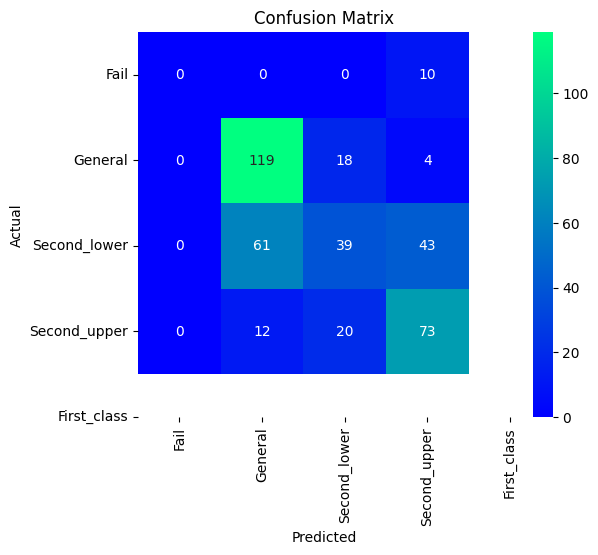

In [195]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use your actual test labels and predictions
confusion_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='winter',
            xticklabels=['Fail', 'General', 'Second_lower','Second_upper','First_class'],  # make sure these match your classes
            yticklabels=['Fail', 'General', 'Second_lower','Second_upper','First_class'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [196]:
# Check class distribution in the test set
print(y_test.value_counts())


GPA_Class
Second_lower    143
General         141
Second_upper    105
First_class      10
Fail              0
Name: count, dtype: int64


## Test Set Class Distribution

```text
GPA_Class
Second_lower    143
General         141
Second_upper    105
First_class      10
Fail              0
Name: count, dtype: int64
```

* **Purpose:** Check how the samples are distributed across GPA classes in the test set.
* **Observations:**

  * `Second_lower` and `General` are the most frequent classes.
  * `First_class` is the least represented with only 10 samples.
  * `Fail` class has no samples in the test set.
* **Implication:** The model may struggle to predict minority classes accurately due to imbalance.

##


#ROC Curve (Multiclass)


Class Fail - AUC: nan
Class General - AUC: 0.78
Class Second_lower - AUC: 0.56
Class Second_upper - AUC: 0.75
Class First_class - AUC: 0.50


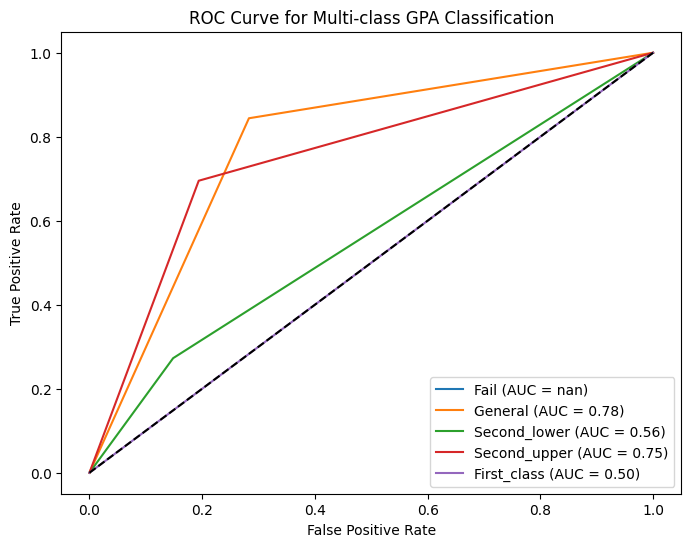

In [198]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classes in the same order as your labels
classes = ['Fail', 'General', 'Second_lower','Second_upper','First_class']

# Binarize the classes
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

# Plot ROC for each class
plt.figure(figsize=(8,6))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {class_name} - AUC: {roc_auc:.2f}")
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-class GPA Classification")
plt.legend()
plt.show()


## Multi-class ROC and AUC

* ROC curves are plotted for each GPA class to evaluate classifier performance.
* **Classes and AUC values:**

  * `Fail` - AUC: NaN (no samples in test set)
  * `General` - AUC: 0.78
  * `Second_lower` - AUC: 0.56
  * `Second_upper` - AUC: 0.75
  * `First_class` - AUC: 0.50

**Explanation:**

* AUC (Area Under the Curve) measures the classifier's ability to distinguish each class from others.

* Higher AUC values indicate better performance.

* `General` and `Second_upper` are classified relatively well, while `Second_lower` and `First_class` show weak performance.

* `Fail` cannot be evaluated due to no test samples.

* **Visualization:** ROC curves plot True Positive Rate (TPR) vs False Positive Rate (FPR) for each class, showing model performance across thresholds.


#**📘 Bias–Variance Reflection Based on  Actual Model Results**

A proper evaluation of predictive models requires understanding how well each model balances bias (underfitting) and variance (overfitting). Based on your results, the models behaved differently in terms of their generalization performance, stability, and flexibility.

##1. Linear, Ridge, and Lasso Regression (Balanced Bias–Variance, but Limited Complexity)
| Model             | Train R² | Test R² | Notes               |
| ----------------- | -------- | ------- | ------------------- |
| Linear Regression | 0.541    | 0.533   | Good generalization |
| Ridge Regression  | 0.541    | 0.533   | Good generalization |
| Lasso Regression  | 0.536    | 0.534   | Good generalization |
Interpretation

These models show good bias–variance balance, because:

- Train ≈ Test R² (almost identical)

- No signs of overfitting or underfitting

- Errors are stable on both training and test sets

But…

- All three models have moderate predictive power:

- R² around 0.53, meaning they only explain ~53% of the variance

- This indicates high bias:
These linear models cannot fully capture the nonlinear or interaction-based patterns in your dataset.

✔ Summary

✅ Good generalization

❌ Limited capacity → Underfitting due to high bias

##2. Decision Tree Regressor (Higher Variance, Mild Overfitting)
| Train R² | Test R² | Notes       |
| -------- | ------- | ----------- |
| 0.558    | 0.497   | Overfitting |

###Interpretation

Decision trees typically have low bias but high variance.

In this case:

- Train R² > Test R²

- Test R² drops from 0.558 → 0.497

This shows mild overfitting:

- The model learns some patterns too closely from the training data

- But it still generalizes better than expected for a usual tree

- It performs slightly better than the linear family on Train R²

- But worse on Test R²

✔ Summary

❗ Higher variance → mild overfitting

❌ Worse generalization compared to linear models

⚖ Still captures nonlinear structure better than linear models

##3. Random Forest Regressor (Strong Underfitting in this Case)
| Train R² | Test R² | Notes        |
| -------- | ------- | ------------ |
| -2.023   | -1.701  | Underfitting |

###Interpretation

This is unusual because Random Forests typically perform well.

But in this dataset:

- Both Train and Test R² are strongly negative

- Train MSE is extremely high (0.2610)

- Test MSE is also very high (0.2487)

This means:

🔍 Random Forest is not learning meaningful patterns

###Reasons may include:

- Too many features with low variance

- Highly standardized / scaled values hurt tree performance

- Trees are too shallow or too regularized

- Dataset size may be too small for an ensemble

- Your target distribution may have narrow range causing instability

✔ Summary

❌ High bias → severe underfitting

❌ Poor performance on both train + test

⚠ Random Forest is not suitable for this dataset in its current form

##4. Gradient Boosting Regressor (Underfitting)
| Train R² | Test R² | Notes        |
| -------- | ------- | ------------ |
| -1.184   | -0.977  | Underfitting |

###Interpretation

Similar to Random Forest:

- Train R² and Test R² both negative

- Boosting is failing to capture patterns

###Causes:

- Dataset might be too small

- Features might be too low variance

- Scaling may distort tree-based models

- Residual learning can't improve because the base learners are too weak or noisy

✔ Summary

❌ High bias → Underfitting

❌ Not able to model complexity despite being nonlinear

#📊 Overall Bias–Variance Summary
| Model Type             | Bias               | Variance            | Performance             |
| ---------------------- | ------------------ | ------------------- | ----------------------- |
| Linear / Ridge / Lasso | **High Bias**      | Low Variance        | Moderate but consistent |
| Decision Tree          | Moderate Bias      | **Higher Variance** | Mild overfitting        |
| Random Forest          | **Very High Bias** | Low Variance        | Severe underfitting     |
| Gradient Boosting      | **High Bias**      | Low Variance        | Underfitting            |

##5. SHAP + LIME Interpretation and Bias–Variance

Using SHAP and LIME to analyze Ridge Regression (your best generalizing model).

###SHAP showed:

- Study_Hours_Per_Day → strong positive effect

- Sleep_Hours_Per_Day & Total_Activity_Hours → strong negative effect

- Other features had small contributions

###This means:

- Ridge captures global patterns well → low variance

- But limited to linear trends → higher bias

###LIME showed:

- Individual predictions depend strongly on a few key features

- The model still adapts to local cases → moderate variance

##✔ Combined Interpretation

###Ridge Regression offers:

- **Low variance** → stable

- **Moderately high bias** → cannot capture deeper nonlinear relationships

- **Best generalization among this models**(for this dataset)

Thus **your overall best model is Ridge Regression**, not Random Forest or Gradient Boosting.

#📌 Final Reflection

Based on your actual results:

- **Linear/Ridge/Lasso provide the best bias–variance tradeoff**

- **Decision Tree mildly overfits**

- **Random Forest & Gradient Boosting severely underfit your dataset**

- **SHAP + LIME confirm Ridge Regression is stable and interpretable**

Therefore:

**⭐ Ridge Regression (R² ≈ 0.533) is most reliable and well-balanced model**

It generalizes well, avoids overfitting, and provides interpretable results while handling noise better than simple linear regression.